In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
#  to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [41]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [42]:
df = pd.DataFrame(
data = np.c_[iris["data"],iris["target"]],
columns = iris["feature_names"]+["target"]
)
# here the target is converted to numreicals

In [43]:
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [44]:
# x.value_count()
df["target"].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

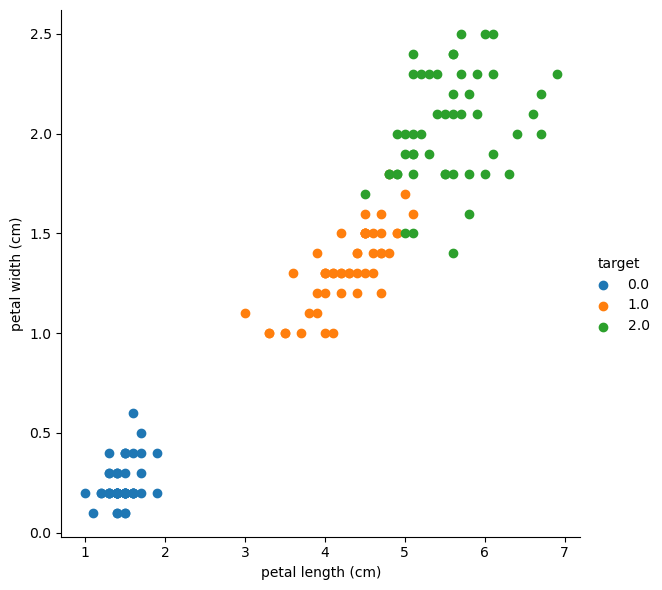

In [45]:
sns.FacetGrid(df,hue = "target",size = 6).map(plt.scatter,"petal length (cm)","petal width (cm)").add_legend()

In [46]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)
print(model)
# the main dsadvantage of DecisionTree id it will overfit the data hence  give the pure result
# thus we use the parameter max_depth to stop the growth of tree

DecisionTreeClassifier()


In [47]:
model.score(iris.data,iris.target)

1.0

In [48]:
expected = iris.target
predicted = model.predict(iris.data)

In [49]:
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [50]:
print(metrics.confusion_matrix(expected,predicted))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [51]:
print(metrics.accuracy_score(expected,predicted))

1.0


In [52]:
# Metrics    
# classification_report(X,y)
# confusion_matrixs(X,y)
# accuracy_score(X,y)

In [53]:
model1 = DecisionTreeClassifier(criterion = "entropy",max_depth = 3)

In [54]:
model1.fit(iris.data,iris.target)
model1

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [55]:
model1.score(iris.data,iris.target)

0.9733333333333334

In [56]:
expected = iris.target
predicted = model1.predict(iris.data)

In [57]:
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))
print(metrics.accuracy_score(expected,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
0.9733333333333334


In [58]:
def Decision_Tree(Type,Depth):
        # import some data to play with
        iris = datasets.load_iris()
        X = iris.data[:, :2]  # we only take the first two features.
        Y = iris.target
        h = .02  # step size in the mesh
        # we create an instance of Neighbours Classifier and fit the data.
        model =DecisionTreeClassifier(criterion=Type,max_depth=Depth)  
                
        model.fit(X, Y)
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize=(4, 3))
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.show()
        
        model.fit(iris.data, iris.target)
        expected = iris.target
        predicted = model.predict(iris.data)
        print(metrics.classification_report(expected, predicted))
        print(metrics.confusion_matrix(expected, predicted))

In [59]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

In [60]:
i = interact(Decision_Tree, Type=['gini','entropy'],Depth=(1,10))

interactive(children=(Dropdown(description='Type', options=('gini', 'entropy'), value='gini'), IntSlider(value…